In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import polaris

/opt/conda/envs/plumber_polaris_2/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import polaris as po

dataset = po.load_dataset("optic/plumber")

⠹ Fetching dataset... 

⠦ Fetching dataset... 

2024-11-18 13:41:26.089 | WARNING  | polaris.dataset._base:zarr_root:179 - You're loading data from a remote location. If the dataset is small enough, consider caching the dataset first using DatasetV2.cache() for more performant data access.


✅ SUCCESS: Fetched dataset.
 


/opt/conda/envs/plumber_polaris_2/lib/python3.11/site-packages/yaspin/core.py:239: UserWarning: color, on_color and attrs are not supported when running in jupyter
  self._color = self._set_color(value) if value else value


In [3]:
dataset.load_to_memory()

In [40]:
data = pd.DataFrame({
    'smiles': dataset[:, 'smiles'],
    'uniprot_id': dataset[:, 'uniprot_id'],
    'split': dataset[:, 'split'],
    'source': dataset[:, 'source']
})

In [53]:
sum(activity_by_source)

1842746

In [41]:
source_counts = data['source'].value_counts()
activity_by_source = np.array([source_counts['bdb'], source_counts['chembl'], source_counts['biolip']])
activity_by_source

array([1739733,   88501,   14512])

In [42]:
source_counts

source
bdb       1739733
chembl      88501
biolip      14512
Name: count, dtype: int64

In [43]:
train = data[data['split'] == 'train']
val = data[data['split'] == 'val']
test = data[data['split'] == 'test']

In [44]:
train_mols = train['smiles'].nunique()
val_mols = val['smiles'].nunique()
test_mols = test['smiles'].nunique()

train_prots = train['uniprot_id'].nunique()
val_prots = val['uniprot_id'].nunique()
test_prots = test['uniprot_id'].nunique()

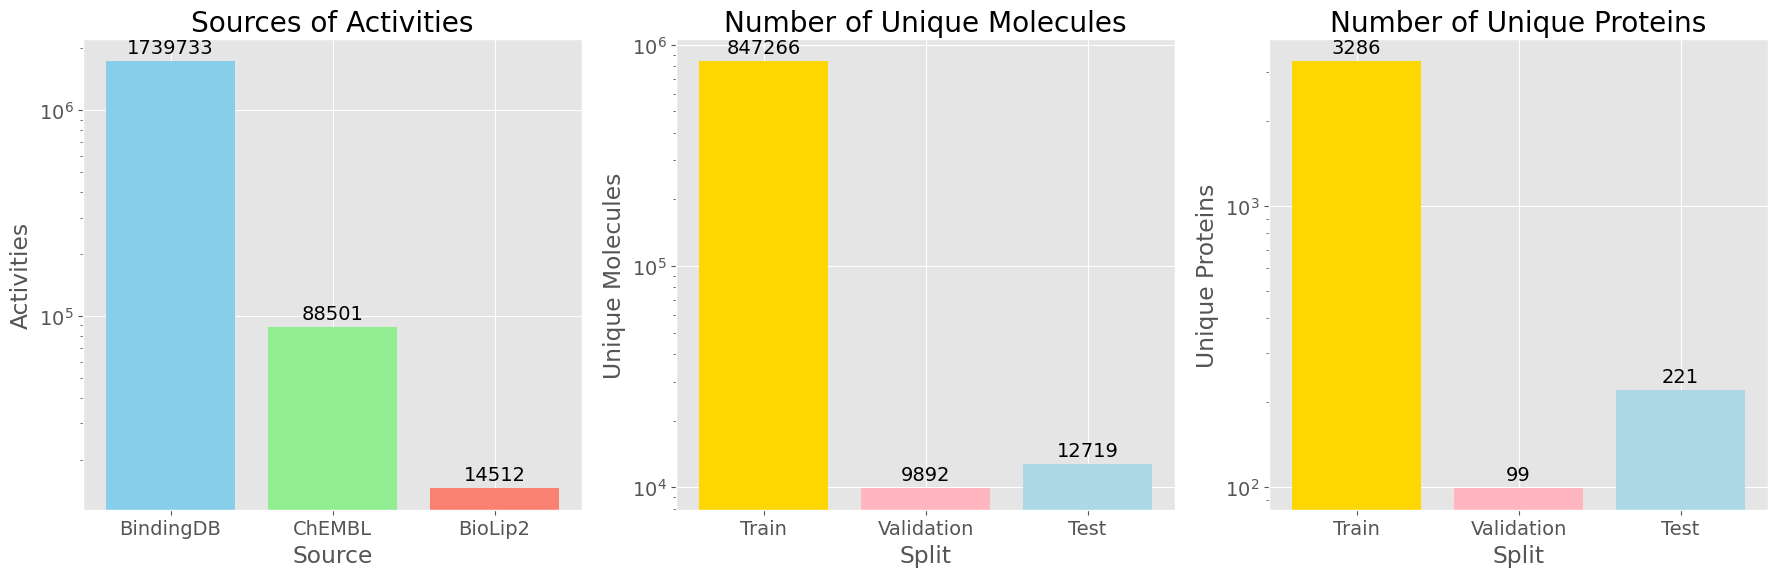

In [45]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

bars = axes[0].bar(['BindingDB', 'ChEMBL', 'BioLip2'], activity_by_source, color=['skyblue', 'lightgreen', 'salmon'])
axes[0].set_xlabel('Source')
axes[0].set_ylabel('Activities')
axes[0].set_title('Sources of Activities')
for bar in bars:
    height = bar.get_height()
    axes[0].annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
#axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].set_yscale('log')

bars = axes[1].bar(['Train', 'Validation', 'Test'], [train_mols, val_mols, test_mols], color=['gold', 'lightpink', 'lightblue'])
axes[1].set_xlabel('Split')
axes[1].set_ylabel('Unique Molecules')
axes[1].set_title('Number of Unique Molecules')
for bar in bars:
    height = bar.get_height()
    axes[1].annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
#axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].set_yscale('log')

bars = axes[2].bar(['Train', 'Validation', 'Test'], [train_prots, val_prots, test_prots], color=['gold', 'lightpink', 'lightblue'])
axes[2].set_xlabel('Split')
axes[2].set_ylabel('Unique Proteins')
axes[2].set_title('Number of Unique Proteins')
for bar in bars:
    height = bar.get_height()
    axes[2].annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
#axes[2].grid(axis='y', linestyle='--', alpha=0.7)
axes[2].set_yscale('log')



plt.tight_layout()
plt.show()

/var/tmp/ipykernel_276943/3182209951.py:38: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axes[0].set_ylim([0, 3000000])
/var/tmp/ipykernel_276943/3182209951.py:65: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axes[1].set_ylim([0, 1500000])
/var/tmp/ipykernel_276943/3182209951.py:93: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axes[2].set_ylim([0, 5000])


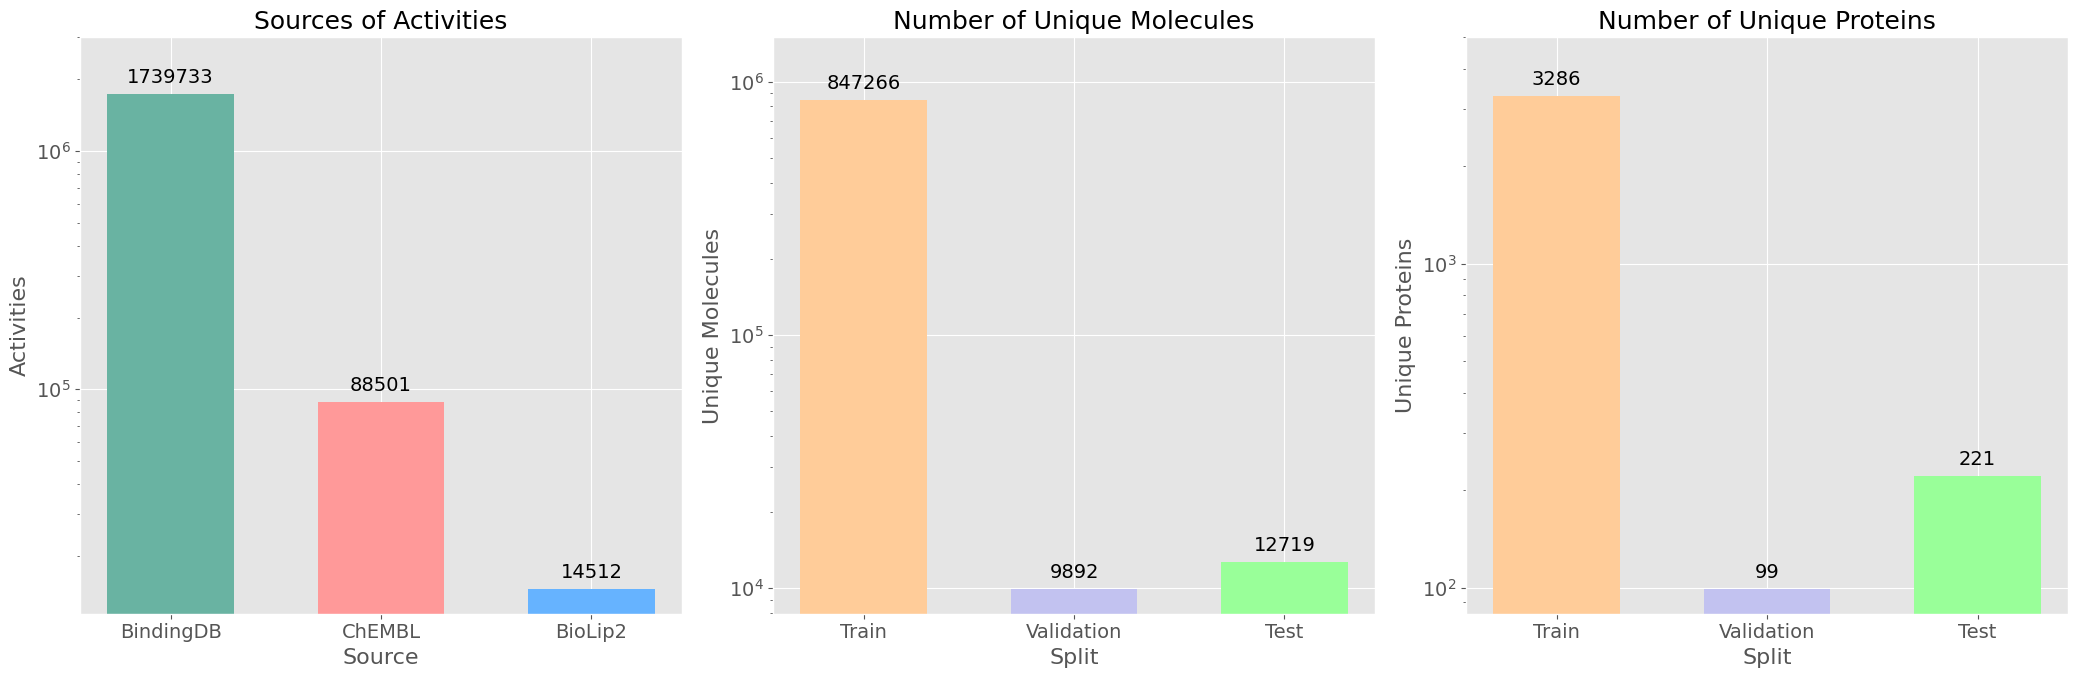

In [51]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Choose a different built-in style since seaborn isn't available
plt.style.use('ggplot')  # Alternatives: 'classic', 'fivethirtyeight', 'ggplot', etc.

# Increase global font size
plt.rcParams.update({'font.size': 14})

fig, axes = plt.subplots(1, 3, figsize=(21, 7))  # Increased figure size for better spacing

# Define a narrower bar width
bar_width = 0.6

# First Bar Plot: Sources of Activities
bars = axes[0].bar(
    ['BindingDB', 'ChEMBL', 'BioLip2'],
    activity_by_source,
    color=['#69b3a2', '#ff9999', '#66b3ff'],
    width=bar_width
)
axes[0].set_xlabel('Source', fontsize=16)
axes[0].set_ylabel('Activities', fontsize=16)
axes[0].set_title('Sources of Activities', fontsize=18)

# Add annotations with increased font size
for bar in bars:
    height = bar.get_height()
    axes[0].annotate(f'{height}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 5),  # 5 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom',
                     fontsize=14)  # Increased font size

# Set y-scale to log
axes[0].set_yscale('log')
axes[0].set_ylim([0, 3000000])

# Removed grid lines for a cleaner look

# Second Bar Plot: Number of Unique Molecules
bars = axes[1].bar(
    ['Train', 'Validation', 'Test'],
    [train_mols, val_mols, test_mols],
    color=['#ffcc99', '#c2c2f0', '#99ff99'],
    width=bar_width
)
axes[1].set_xlabel('Split', fontsize=16)
axes[1].set_ylabel('Unique Molecules', fontsize=16)
axes[1].set_title('Number of Unique Molecules', fontsize=18)

# Add annotations with increased font size
for bar in bars:
    height = bar.get_height()
    axes[1].annotate(f'{height}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 5),
                     textcoords="offset points",
                     ha='center', va='bottom',
                     fontsize=14)  # Increased font size

# Set y-scale to log
axes[1].set_yscale('log')
axes[1].set_ylim([0, 1500000])

# Removed grid lines for a cleaner look

# Third Bar Plot: Number of Unique Proteins
bars = axes[2].bar(
    ['Train', 'Validation', 'Test'],
    [train_prots, val_prots, test_prots],
    color=['#ffcc99', '#c2c2f0', '#99ff99'],
    width=bar_width
)
axes[2].set_xlabel('Split', fontsize=16)
axes[2].set_ylabel('Unique Proteins', fontsize=16)
axes[2].set_title('Number of Unique Proteins', fontsize=18)


# Add annotations with increased font size
for bar in bars:
    height = bar.get_height()
    axes[2].annotate(f'{height}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 5),
                     textcoords="offset points",
                     ha='center', va='bottom',
                     fontsize=14)  # Increased font size

# Set y-scale to log
axes[2].set_yscale('log')
axes[2].set_ylim([0, 5000])

# Removed grid lines for a cleaner look

# Adjust layout for better spacing
plt.tight_layout()


plt.show()
